In [ ]:
import numpy as np
from qiskit import *
import mapomatic as mm
from qiskit_ibm_runtime.fake_provider import FakeMontrealV2, FakeAlmadenV2, FakeAthensV2, FakeBoeblingenV2

In [3]:
qc = QuantumCircuit(5)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.cx(0,4)
qc.measure_all()

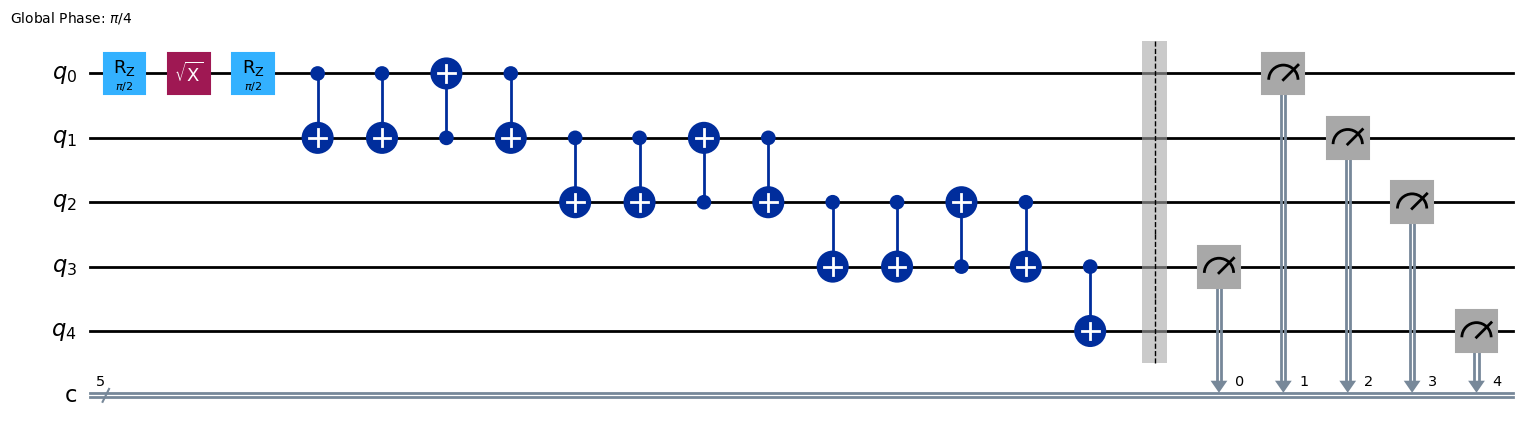

In [35]:
backend = FakeAthensV2()
trans_qc = transpile(qc, backend=backend, optimization_level=0)
small_qc = mm.deflate_circuit(trans_qc)
small_qc.draw('mpl')

In [29]:
layouts = mm.matching_layouts(small_qc, backend)

In [30]:
scores = mm.evaluate_layouts(small_qc, layouts, backend)
print(scores)

[([0, 1, 2, 3, 4], 0.23460324403204869), ([4, 3, 2, 1, 0], 0.26645637761791996)]


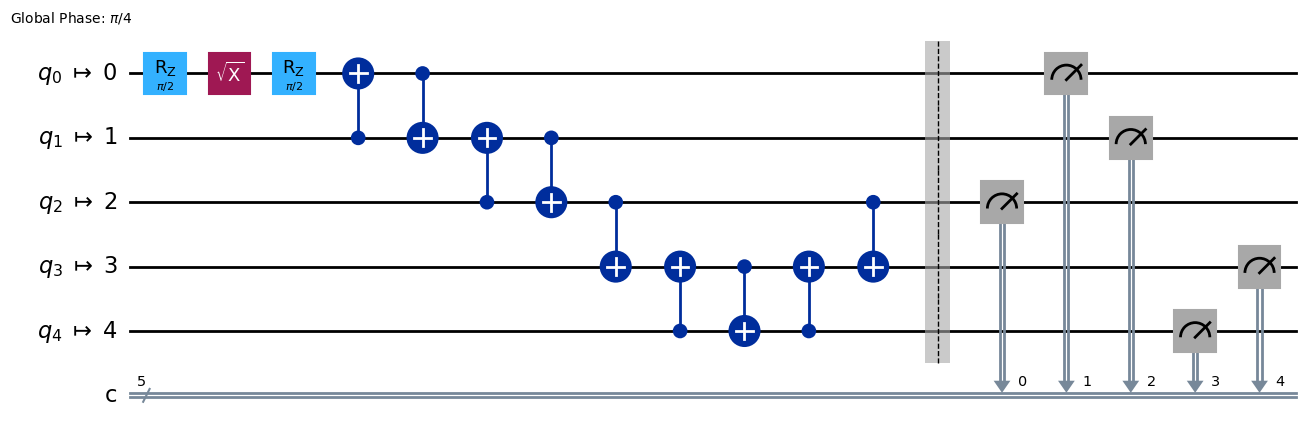

In [31]:
best_qc = transpile(small_qc, backend, initial_layout=scores[0][0])
best_qc.draw('mpl')

In [ ]:
backends = [FakeBoeblingenV2(), FakeAthensV2(), FakeAlmadenV2(), FakeBoeblingenV2()]
mm.best_overall_layout(small_qc, backends)

<class 'list'>


([0, 1, 2, 3, 4], 'fake_athens', 0.23460324403204869)

In [34]:
mm.best_overall_layout(small_qc, backends, successors=True)

[([0, 1, 2, 3, 4], 'fake_athens', 0.23460324403204869)]

In [ ]:
mm.best_overall_layout(small_qc, backends, successors=True)